In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_parquet(r"C:\Users\tirth\Documents\Projects\Halo - galaxy connection\CAMELS_datas\camels_astrid_sb7_090.parquet")
df = df[df['is_central'] == True].copy()

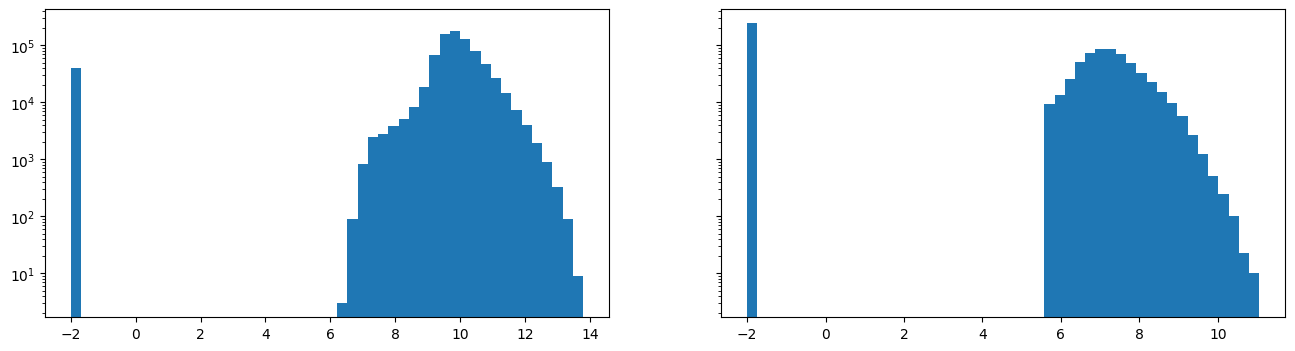

In [27]:
fig, axs = plt.subplots(1, 2, figsize = (16, 4), sharey = True, dpi = 100)

axs[0].hist(np.log10(df['Mg'] + 0.01), bins = 50)
axs[0].set_yscale('log')

axs[1].hist(np.log10(df['MBH'] + 0.01), bins = 50)
axs[1].set_yscale('log')

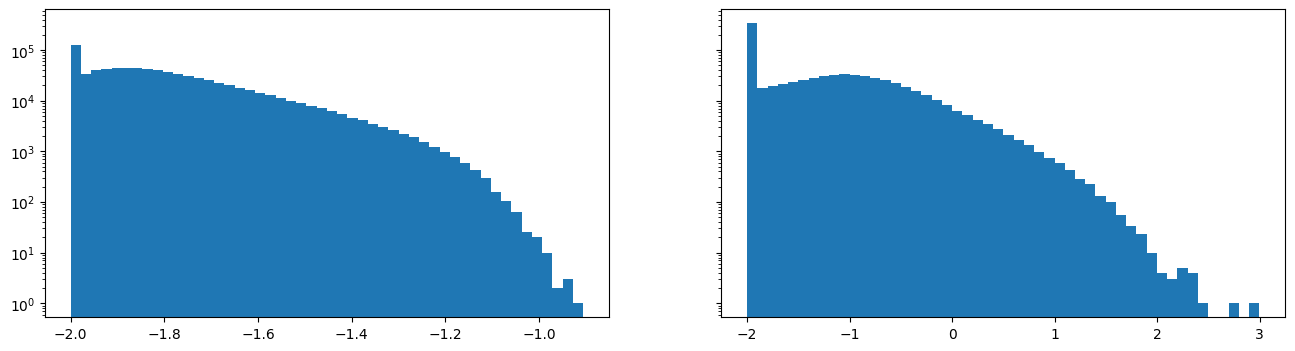

In [28]:
fig, axs = plt.subplots(1, 2, figsize = (16, 4), sharey = True, dpi = 100)

axs[0].hist(np.log10(df['Zg'] + 0.01), bins = 50)
axs[0].set_yscale('log')

axs[1].hist(np.log10(df['SFR'] + 0.01), bins = 50)
axs[1].set_yscale('log')

In [29]:
import numpy as np
import pandas as pd

def apply_gaussian_dequantization(df, column, target_mu, sigma=0.5):
    """
    Replaces zeros with a Gaussian distribution in log-space.
    """
    vals = df[column].values
    mask_zero = (vals == 0)
    num_zeros = np.sum(mask_zero)
    
    # Initialize log array
    log_vals = np.zeros_like(vals, dtype=float)
    
    # 1. Handle non-zeros: Standard Log10
    log_vals[~mask_zero] = np.log10(vals[~mask_zero])
    
    # 2. Handle zeros: Sample from N(mu, sigma)
    # This creates the 'island' of zeros far to the left
    log_vals[mask_zero] = np.random.normal(loc=target_mu, scale=sigma, size=num_zeros)
    
    return log_vals

# Applying to your specific Astrid columns
df['log_SFR'] = apply_gaussian_dequantization(df, 'SFR', target_mu=-15.0)
df['log_Mg']  = apply_gaussian_dequantization(df, 'Mg',  target_mu=-5.0)
df['log_MBH'] = apply_gaussian_dequantization(df, 'MBH', target_mu=-5.0)
df['log_Zg']  = apply_gaussian_dequantization(df, 'Zg',  target_mu=-15.0)

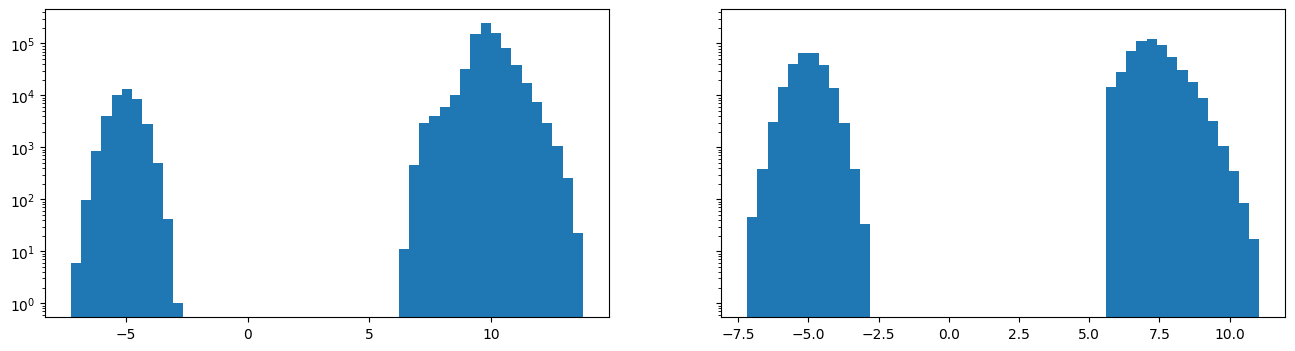

In [30]:
fig, axs = plt.subplots(1, 2, figsize = (16, 4), sharey = True, dpi = 100)

axs[0].hist(df['log_Mg'], bins = 50)
axs[0].set_yscale('log')

axs[1].hist(df['log_MBH'], bins = 50)
axs[1].set_yscale('log')

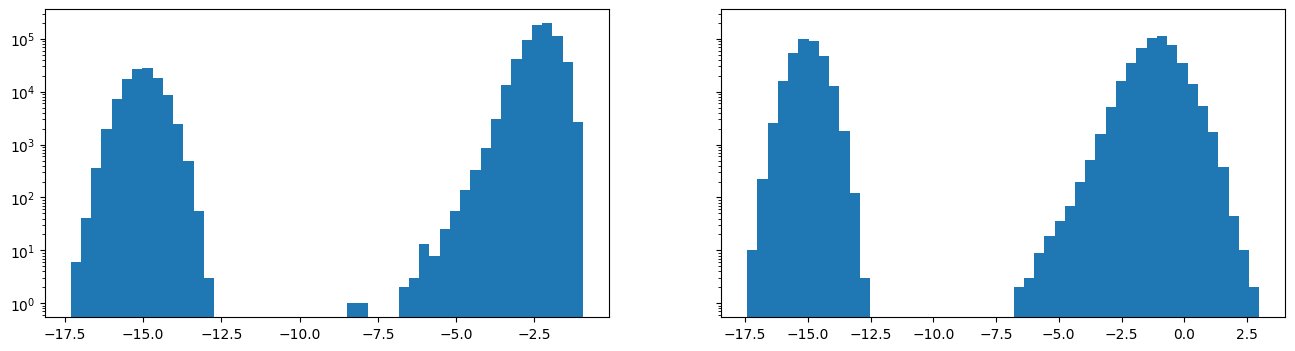

In [31]:
fig, axs = plt.subplots(1, 2, figsize = (16, 4), sharey = True, dpi = 100)

axs[0].hist(df['log_Zg'], bins = 50)
axs[0].set_yscale('log')

axs[1].hist(df['log_SFR'], bins = 50)
axs[1].set_yscale('log')